import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


import the dataset

In [2]:
df = pd.read_csv('mnist_784.csv')
df.shape


(70000, 785)

split Features and Target

In [3]:
X = df.drop('class', axis=1)
y = df['class']

Visualize Some Handwritten Digits

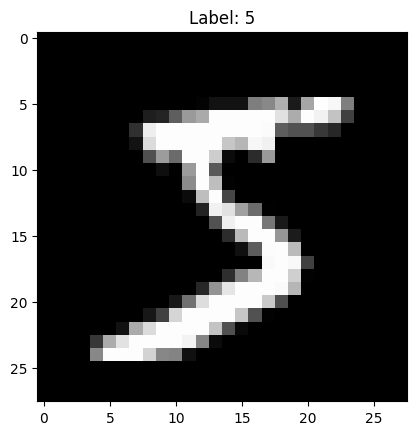

In [4]:
first_image = X.iloc[0].values.reshape(28,28)
plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {y.iloc[0]}")
plt.show()


Normalize the Data

In [5]:
X = X / 255.0


Split The Dataset Into Train & Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Verify The Shape Of Data

In [7]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(56000, 784) (14000, 784)
(56000,) (14000,)


Train The Machine Learning Model using Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model Training Completed ✅")

Model Training Completed ✅


Make Predictions (Test the Model)

In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 96.75%


Check Confusion Matrix

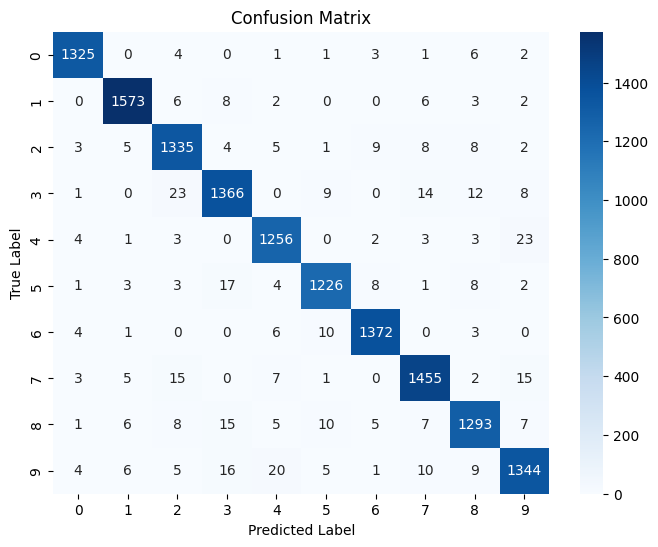

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Test On A Single Handwritten Digit

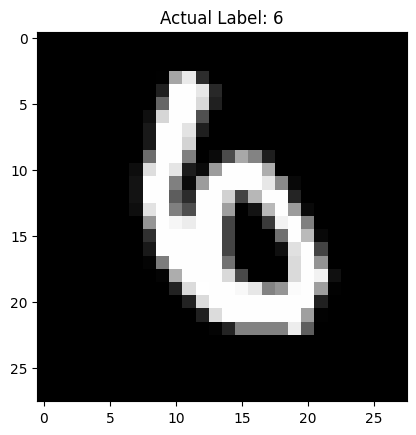

Predicted Label: 6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
index = 6
single_image = X_test.iloc[index].values.reshape(28,28)
plt.imshow(single_image, cmap='gray')
plt.title(f"Actual Label: {y_test.iloc[index]}")
plt.show()

predicted_digit = model.predict([X_test.iloc[index]])
print(f"Predicted Label: {predicted_digit[0]}")


Save the Model

In [13]:
import joblib
joblib.dump(model, 'digit_recognition_model.pkl')
print("Model Saved Successfully ")


Model Saved Successfully 
